# Visualizing statistical relationships

In [ ]:
# import seaborn
import seaborn as sns

# set seaborn theme
sns.set_theme(style="darkgrid")

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables.

Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

The **`relplot()`** function is a *figure-level* function for visualizing statistical relationships using two common approaches: scatter plots and line plots.

# Relating variables with scatter plots

In the following, we will use the seaborn built-in dataset named “tips”.

the tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant.

The waiter collected several variables: the tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party.



In [ ]:
# load dataframe
tips = sns.load_dataset('tips')

# return first rows of dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The scatter plot is a mainstay of statistical visualization.

It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset.

This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn.

The most basic, which should be used when both variables are numeric, is the `scatterplot()` function, which is the default `kind` in the `relplot()` function (it can also be forced by setting `kind="scatter"`):

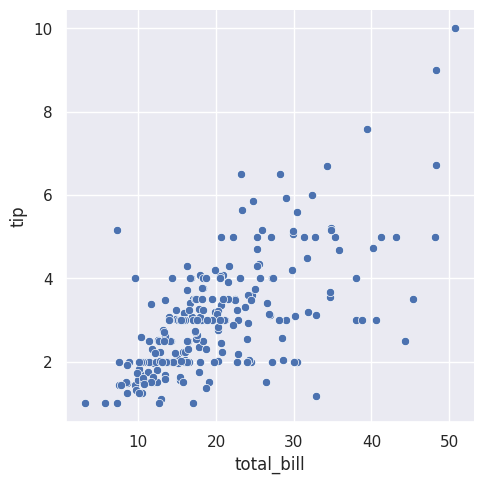

In [ ]:
# set plot
sns.relplot(data=tips, x="total_bill", y="tip")

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.

In seaborn, this is referred to as using a “*hue semantic*”, because the color of the point gains meaning.

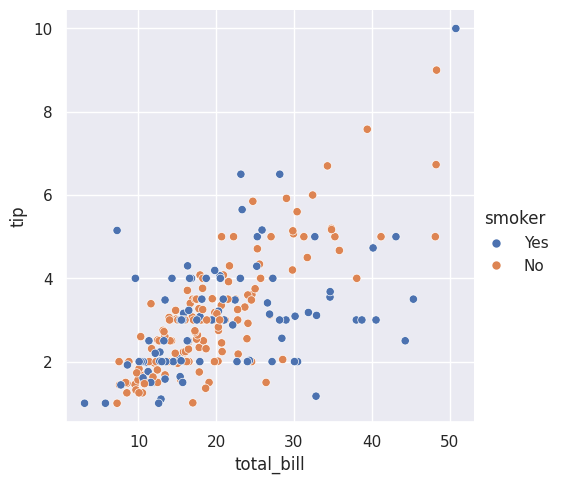

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class.



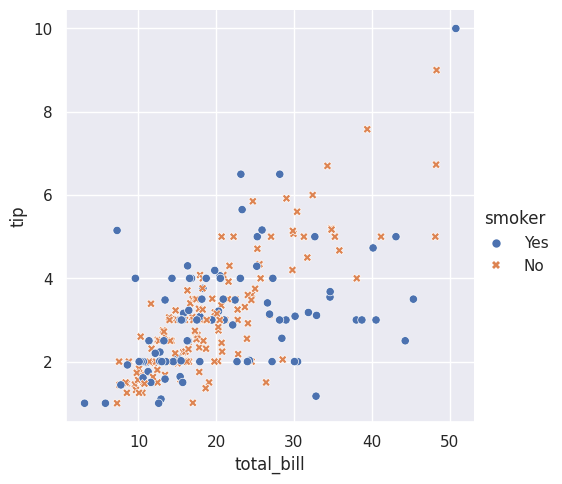

In [ ]:
sns.relplot(
   data=tips,
   x="total_bill", y="tip", hue="smoker", style="smoker"
)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color.

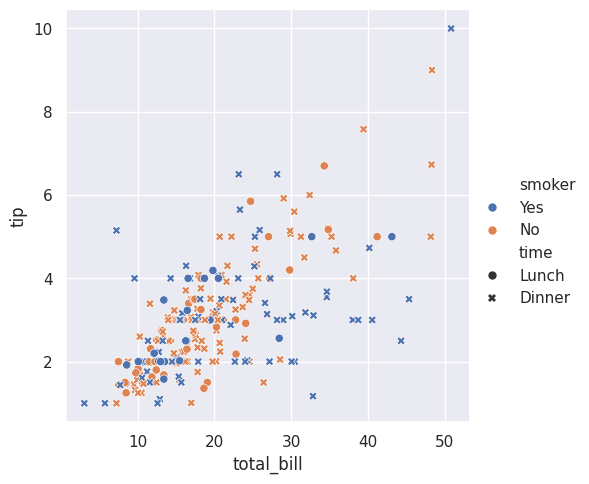

In [ ]:
sns.relplot(
   data=tips,
   x="total_bill", y="tip", hue="smoker", style="time"
)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied.

If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette.

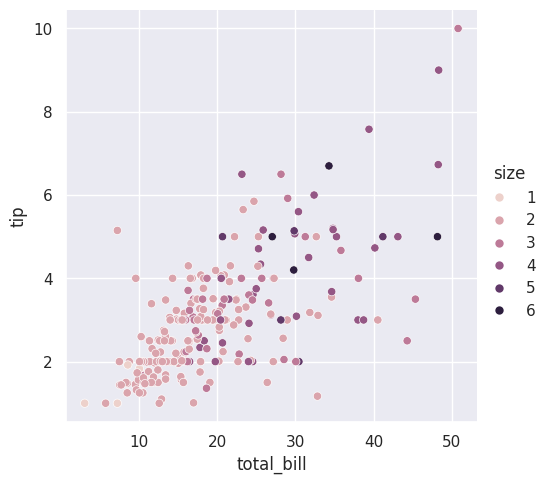

In [ ]:
sns.relplot(
  data=tips, x="total_bill", y="tip", hue="size"
)

Another kind of semantic variable changes the size of each point.

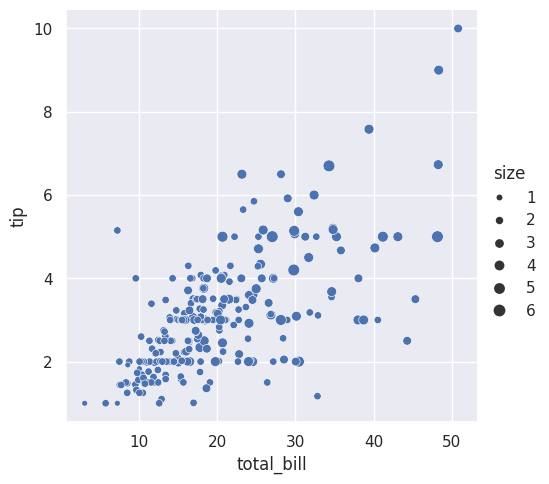

In [ ]:
sns.relplot(
  data=tips, x="total_bill", y="tip", size="size"
)

# Emphasizing continuity with line plots

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.

In this situation, a good choice is to draw a line plot.

In seaborn, this can be accomplished by the `lineplot()` function, either directly or with `relplot()` by setting `kind="line"`.

In the following, we will use the seaborn built-in dataset named “dowjones”.

The dowjones dataset is a data frame with 649 rows and 2 variables which represent the date and the price.

In [ ]:
# load dataframe
dowjones = sns.load_dataset('dowjones')

# return first rows of dataframe
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


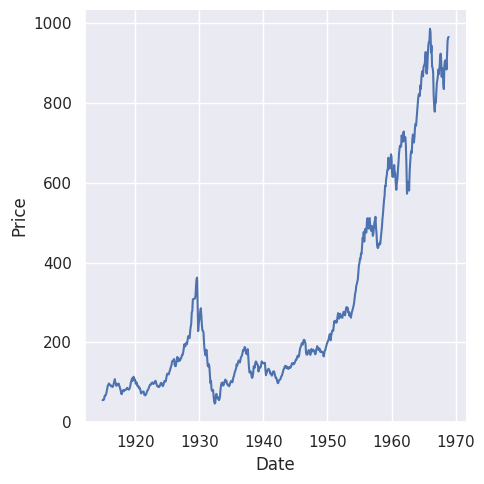

In [ ]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

## Aggregation and representing uncertainty

In the following, we will use the seaborn built-in dataset named “fmri”.

fmri is a dataset containing functional magnetic resonance imaging (fMRI) data from an experiment where participants performed a working memory task. It includes brain activity measurements over time for different regions of interest.

The fmri dataset is a data frame with 1064 rows and 5 variables.

In [ ]:
# load dataframe
fmri = sns.load_dataset('fmri')

# return first rows of dataframe
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


More complex datasets will have multiple measurements for the same value of the `x` variable.

The default behavior in seaborn is to aggregate the multiple measurements at each `x` value by plotting the mean and the 95% confidence interval around the mean:

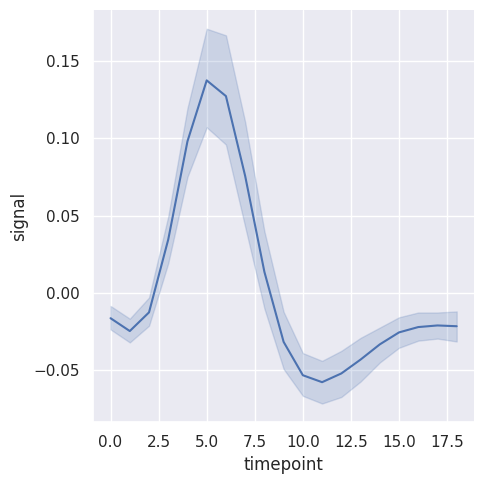

In [ ]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets.

It’s therefore possible to disable them.

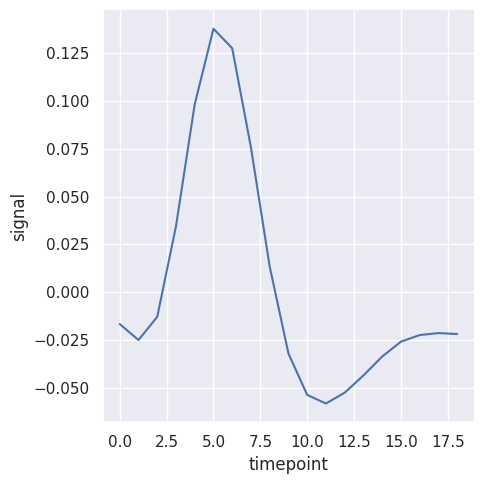

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval.

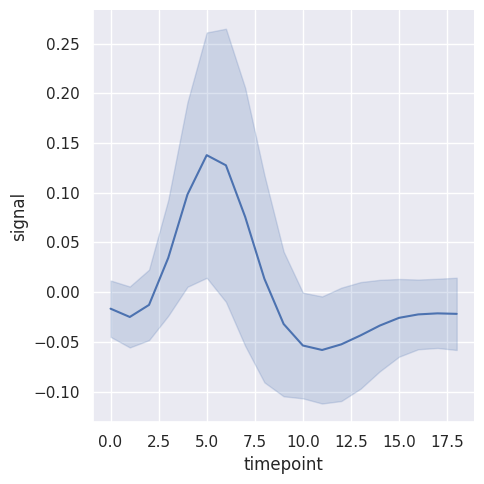

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

##Plotting subsets of data with semantic mappings

The `lineplot()` function has the same flexibility as `scatterplot()`: it can show up to three additional variables by modifying the hue, size, and style of the plot elements.

It does so using the same API as `scatterplot()`, meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in `lineplot()` will also determine how the data get aggregated.

For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.



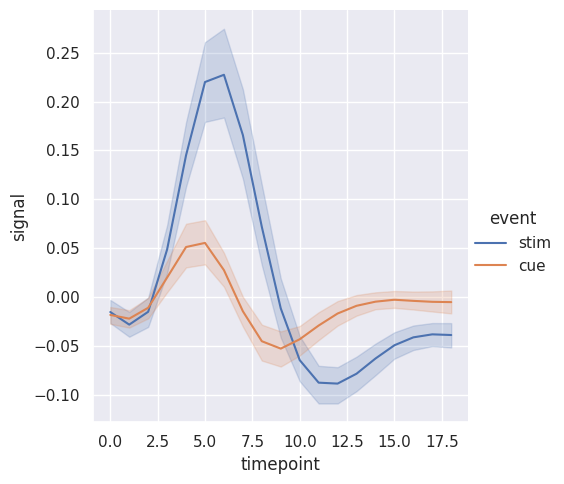

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default.

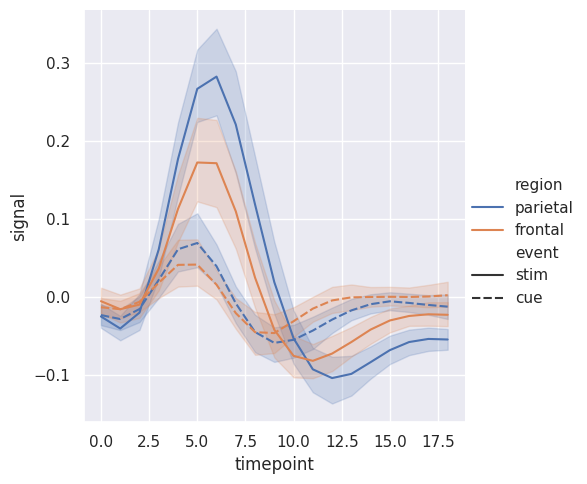

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them.

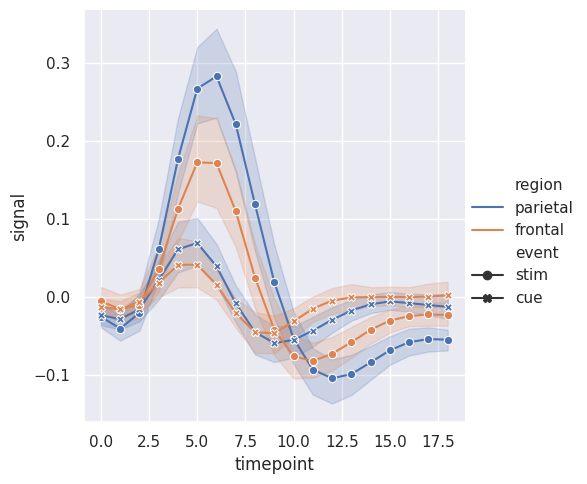

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend.

To turn off aggregation, set the `estimator` parameter to `None`.

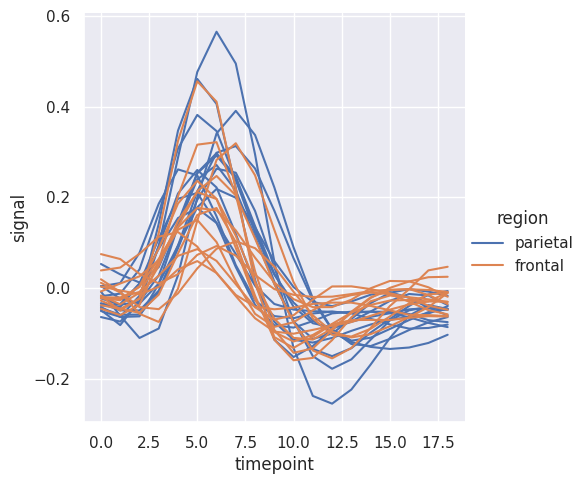

In [ ]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

#Showing multiple relationships with facets

While the `relplot()` functions can show several semantic variables at once, it’s not always effective to do so.

But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot.

Because `relplot()` is based on the `FacetGrid`, this is easy to do.

To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization.

This means that you make multiple axes and plot subsets of the data on each of them.

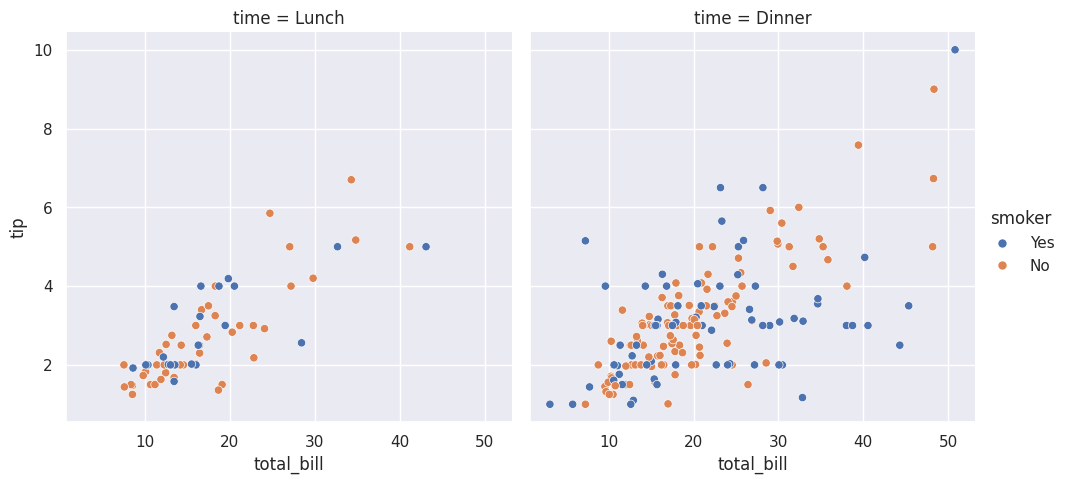

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

You can also show the influence of two variables this way: one by faceting on the columns and one by faceting on the rows.

As you start adding more variables to the grid, you may want to decrease the figure size.

Remember that the size `FacetGrid` is parameterized by the height and aspect ratio of *each facet*.

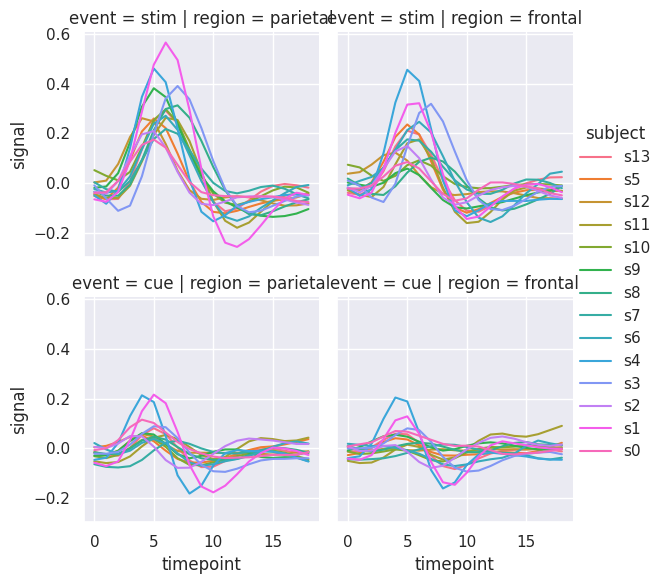

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows.

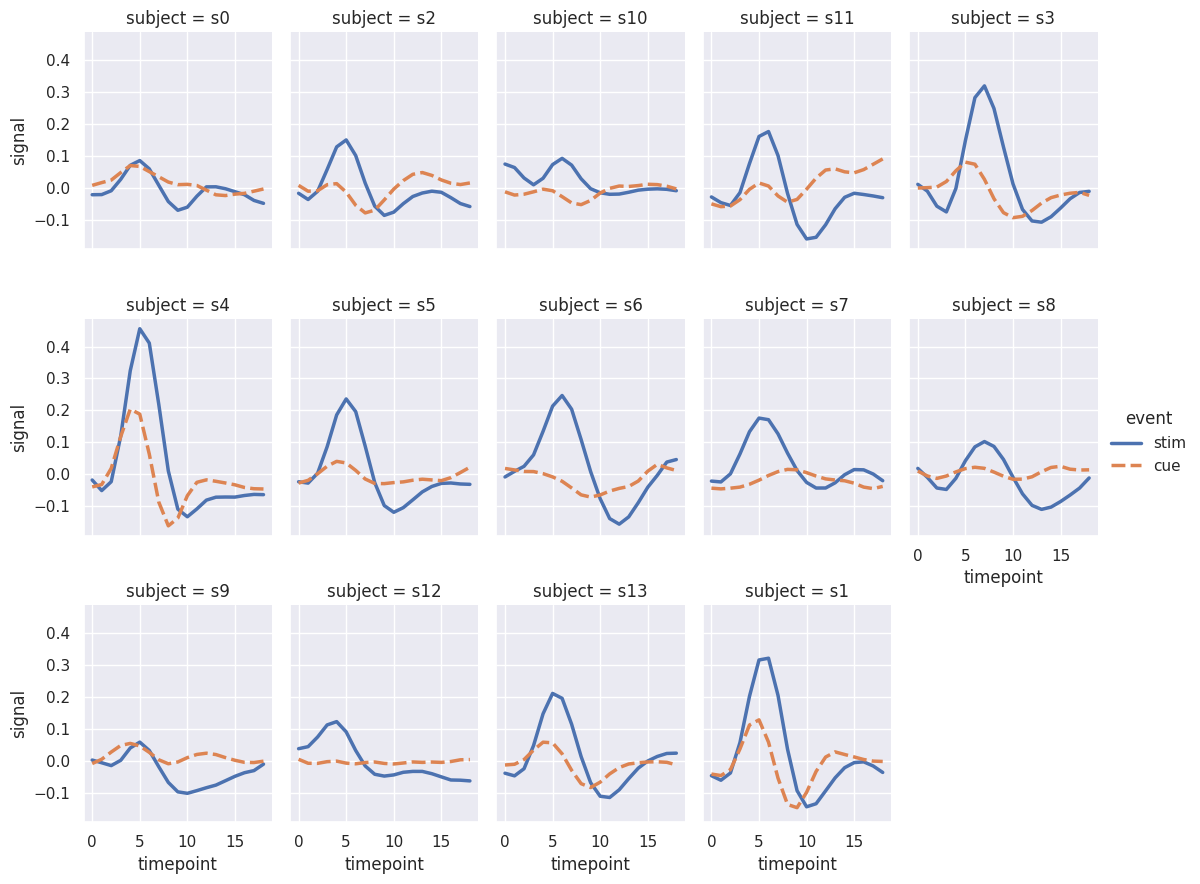

In [ ]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)

These visualizations, which are sometimes called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns.

While you should make use of the flexibility afforded by `scatterplot()` and `relplot()`, always try to keep in mind that several simple plots are usually more effective than one complex plot.